In [7]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import *
import matplotlib.pyplot as plt

## loading of data

In [8]:
data = pd.read_csv('ExpPHa04_4_CD300E-NOTCH3-CSF1R-PDGFRB.tif_1501_job2985.object_results_CLEANED.csv')
data.head()

,Image Location,Analysis Region,Analysis Inputs,Object Id,XMin,XMax,YMin,YMax,Opal 520 Copies,Opal 520 Area (µm²),...,Opal 690 Copies,Opal 690 Area (µm²),Opal 690 Classification,Opal 690 Cell Intensity,Opal 690 Avg Intensity,Cell Area (µm²),Cytoplasm Area (µm²),Nucleus Area (µm²),Nucleus Perimeter (µm),Nucleus Roundness
0,\\172.20.47.181\data\CTC_Lab\Polaris\2020-01(J...,outline,Class List:;Classifier:;Classifier Output Type...,10,7239,7261,418,433,9,4.919379,...,117,25.334800,4,43.079090,1.700392,65.67371,46.24216,19.43155,18.84620,0.843177
1,\\172.20.47.181\data\CTC_Lab\Polaris\2020-01(J...,outline,Class List:;Classifier:;Classifier Output Type...,112,7012,7035,624,646,7,3.197596,...,70,25.334800,4,25.940230,1.023897,92.23836,64.68983,27.54852,22.81382,0.793136
2,\\172.20.47.181\data\CTC_Lab\Polaris\2020-01(J...,outline,Class List:;Classifier:;Classifier Output Type...,131,6945,6965,656,675,2,0.737907,...,90,23.121080,4,33.045590,1.429241,59.77045,43.04456,16.72589,16.36643,0.725469
3,\\172.20.47.181\data\CTC_Lab\Polaris\2020-01(J...,outline,Class List:;Classifier:;Classifier Output Type...,251,7234,7253,815,836,8,4.673410,...,26,13.774260,4,9.252905,0.671753,72.56084,43.29053,29.27030,22.81382,0.736006
4,\\172.20.47.181\data\CTC_Lab\Polaris\2020-01(J...,outline,Class List:;Classifier:;Classifier Output Type...,269,6583,6610,828,854,1,0.245969,...,1,0.491938,1,0.210680,0.428265,114.37560,58.29464,56.08092,32.23692,0.795500


### Renaming of Column names

In [9]:

data.columns = [col.replace(' ', '_') for col in data.columns]
data.columns


Index(['Image_Location', 'Analysis_Region', 'Analysis_Inputs', 'Object_Id',
       'XMin', 'XMax', 'YMin', 'YMax', 'Opal_520_Copies',
       'Opal_520_Area_(µm²)', 'Opal_520_Classification',
       'Opal_520_Cell_Intensity', 'Opal_520_Avg_Intensity', 'Opal_570_Copies',
       'Opal_570_Area_(µm²)', 'Opal_570_Classification',
       'Opal_570_Cell_Intensity', 'Opal_570_Avg_Intensity', 'Opal_620_Copies',
       'Opal_620_Area_(µm²)', 'Opal_620_Classification',
       'Opal_620_Cell_Intensity', 'Opal_620_Avg_Intensity', 'Opal_690_Copies',
       'Opal_690_Area_(µm²)', 'Opal_690_Classification',
       'Opal_690_Cell_Intensity', 'Opal_690_Avg_Intensity', 'Cell_Area_(µm²)',
       'Cytoplasm_Area_(µm²)', 'Nucleus_Area_(µm²)', 'Nucleus_Perimeter_(µm)',
       'Nucleus_Roundness'],
      dtype='object')

In [10]:
# data =data.rename(columns = {"Opal 520 Classification": "Opal_520_Classification", 
#                                   "Opal 570 Classification":"Opal_570_Classification", 
#                                   "Opal 620 Classification":"Opal_620_Classification",
#                                   "Opal 690 Classification":"Opal_690_Classification"}) 

## Function to Calculate Centroids of the rectangular bounding boxes

### Note:
### 1st step: calculating center of detected objects by calculating center of bounding boxes

In [11]:
# Use the height and width to calculate the area
def X_centroid(row):
    X = int(row['XMin'] + row['XMax'])/2

    return int(X)

def Y_centroid(row):
    Y = int(row['YMin'] + row['YMax'])/2
    return int(Y)

data['X'] = data.apply(X_centroid, axis=1)
data['Y'] = data.apply(Y_centroid, axis=1)


### Plotting of coordinates

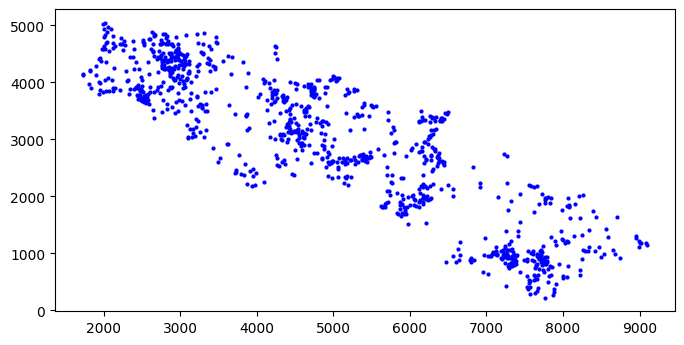

In [12]:
x = np.array(data.X)
y = np.array(data.Y)


w=8
h=4
d=100
plt.figure(figsize=(w, h), dpi=d)
plt.plot(x, y, 'bo', markersize=2)

plt.savefig("/Users/habbasi/Desktop/012120_Halo_outputs/Figures/tissue.png")



### Calculating distances

In [13]:
def classification(row):
    
    if (row['Opal_620_Classification'] == 0) & (row['Opal_690_Classification'] < 2):
        return 'UNCLASSIFIED'
    elif (row['Opal_620_Classification'] == 0) & (row['Opal_690_Classification'] > 1):
        return 'FIBROBLAST'
    elif (row['Opal_620_Classification'] == 1) & (row['Opal_690_Classification'] <= 2):
        return 'UNCLASSIFIED'
    elif (row['Opal_620_Classification'] == 1) & (row['Opal_690_Classification'] > 2):
        return 'FIBROBLAST'
    elif (row['Opal_620_Classification'] == 2) & (row['Opal_690_Classification'] == 0):
        return 'MYELOID'
    elif (row['Opal_620_Classification'] == 2) & (row['Opal_690_Classification'] == 0):
        return 'MYELOID'
    elif (row['Opal_620_Classification'] == 2) & (row['Opal_690_Classification'] == 1):
        return 'UNCLASSIFIED'
    elif (row['Opal_620_Classification'] == 2) & (row['Opal_690_Classification'] == 2):
        return 'MIXED'
    elif (row['Opal_620_Classification'] == 2) & (row['Opal_690_Classification'] == 3):
        return 'MIXED'
    elif (row['Opal_620_Classification'] == 2) & (row['Opal_690_Classification'] == 4):
        return 'FIBROBLAST'
    elif (row['Opal_620_Classification'] == 3) & (row['Opal_690_Classification'] < 2):
        return 'MYELOID'
    elif (row['Opal_620_Classification'] == 3) & (row['Opal_690_Classification'] < 2):
        return 'MYELOID'
    elif (row['Opal_620_Classification'] == 3) & (row['Opal_690_Classification'] > 1):
        return 'MIXED'
    elif (row['Opal_620_Classification'] == 4) & (row['Opal_690_Classification'] < 3):
        return 'MYELOID'
    elif (row['Opal_620_Classification'] == 4) & (row['Opal_690_Classification'] > 2):
        return 'MIXED'
    else:
        return 'NA'
    
    

In [14]:


data['Classification'] = data.apply(classification, axis=1)

data.head()



,Image_Location,Analysis_Region,Analysis_Inputs,Object_Id,XMin,XMax,YMin,YMax,Opal_520_Copies,Opal_520_Area_(µm²),...,Opal_690_Cell_Intensity,Opal_690_Avg_Intensity,Cell_Area_(µm²),Cytoplasm_Area_(µm²),Nucleus_Area_(µm²),Nucleus_Perimeter_(µm),Nucleus_Roundness,X,Y,Classification
0,\\172.20.47.181\data\CTC_Lab\Polaris\2020-01(J...,outline,Class List:;Classifier:;Classifier Output Type...,10,7239,7261,418,433,9,4.919379,...,43.079090,1.700392,65.67371,46.24216,19.43155,18.84620,0.843177,7250,425,FIBROBLAST
1,\\172.20.47.181\data\CTC_Lab\Polaris\2020-01(J...,outline,Class List:;Classifier:;Classifier Output Type...,112,7012,7035,624,646,7,3.197596,...,25.940230,1.023897,92.23836,64.68983,27.54852,22.81382,0.793136,7023,635,FIBROBLAST
2,\\172.20.47.181\data\CTC_Lab\Polaris\2020-01(J...,outline,Class List:;Classifier:;Classifier Output Type...,131,6945,6965,656,675,2,0.737907,...,33.045590,1.429241,59.77045,43.04456,16.72589,16.36643,0.725469,6955,665,FIBROBLAST
3,\\172.20.47.181\data\CTC_Lab\Polaris\2020-01(J...,outline,Class List:;Classifier:;Classifier Output Type...,251,7234,7253,815,836,8,4.673410,...,9.252905,0.671753,72.56084,43.29053,29.27030,22.81382,0.736006,7243,825,MIXED
4,\\172.20.47.181\data\CTC_Lab\Polaris\2020-01(J...,outline,Class List:;Classifier:;Classifier Output Type...,269,6583,6610,828,854,1,0.245969,...,0.210680,0.428265,114.37560,58.29464,56.08092,32.23692,0.795500,6596,841,UNCLASSIFIED


In [15]:
#test.to_csv('/Users/habbasi/Desktop/new.csv')



### Plotting

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
  warn("Saving {0} x {1} {2} image.".format(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/habbasi/Desktop/012120_Halo_outputs/Figures/cell_classification.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


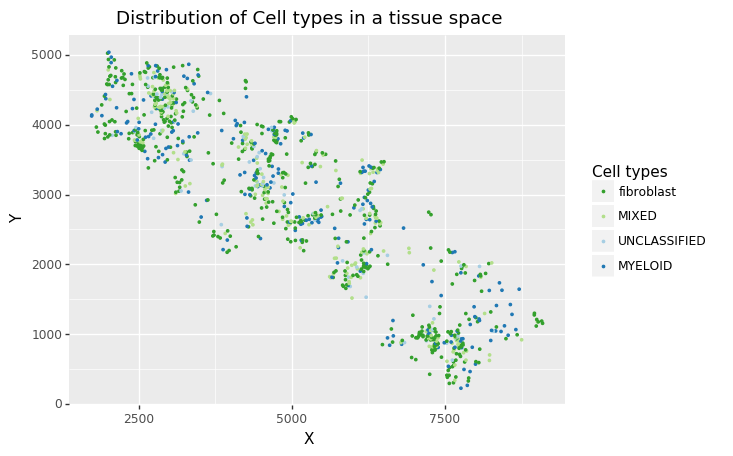

<ggplot: (314874868)>

In [16]:
p = gg.ggplot(data, gg.aes(x='X', y='Y', color= 'Classification')) + \
    gg.geom_point(size = 0.5) + \
    gg.xlab("X") + \
    gg.ylab("Y") + \
    gg.ggtitle("Distribution of Cell types in a tissue space") + \
    gg.scale_colour_manual(name= "Cell types", 
                           labels=['fibroblast', 'MIXED', 'UNCLASSIFIED', 'MYELOID'], 
                           values = ["#33a02c", "#b2df8a", "#a6cee3", "#1f78b4"])
   


    

ggsave(filename='cell_classification.png', plot = p, 
       path = '/Users/habbasi/Desktop/012120_Halo_outputs/Figures')
p 



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
  warn("Saving {0} x {1} {2} image.".format(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/habbasi/Desktop/012120_Halo_outputs/Figures/Total_Count_Celltypes.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


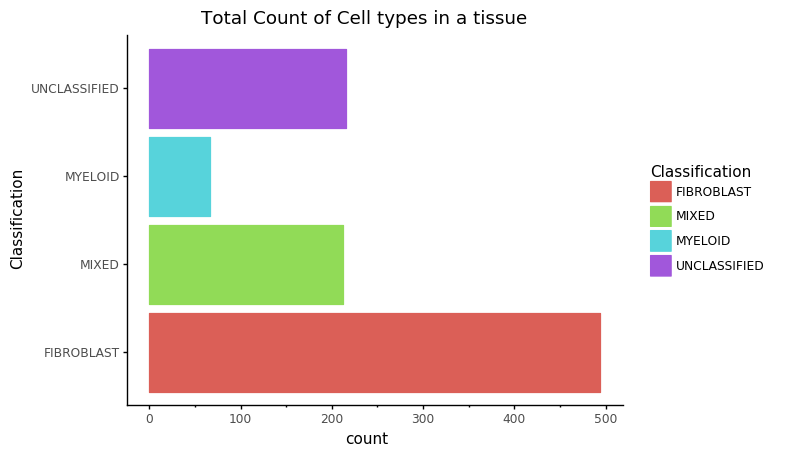

<ggplot: (303265799)>

In [17]:
p = (
    ggplot(data)
    + geom_bar(aes(x='Classification', fill = 'Classification',  color= 'Classification'))
    + coord_flip()
    + theme_classic() +
    gg.ggtitle("Total Count of Cell types in a tissue "))
ggsave(filename='Total_Count_Celltypes.png', plot = p, 
       path = '/Users/habbasi/Desktop/012120_Halo_outputs/Figures')
p

In [20]:
# p = gg.ggplot(data = data, 
#               mapping = gg.aes('distance', color='classification', fill = 'classification')) + \
#               geom_density(alpha = 0.2)
# p +labs(title="Distribution of distances from an Image center",
#         x ="Distance", y = "Density")

## Calculating Distances between cells

In [40]:
import math

combinations = []
for i in data['Classification']:
    for j in data['Classification']:
        comb = [i, j]
        combinations.append(comb)


X = list(data.X)       
Y = list(data.Y)

distance = []  
for i in range(0, len(X)):
    for j in range(0, len(X)):
        dist = math.sqrt((X[j] - X[i])**2 + ((Y[j] - Y[i])**2)) * 0.495952562137432
        distance.append(dist)

coordinates = []        
for i in zip(data.X, data.Y):
    for j in zip(data.X, data.Y):
        cor = [i, j]
        coordinates.append(cor)
        

dist = pd.DataFrame(distance, columns=['Distance'])
meta = pd.DataFrame(combinations, columns=['idx_1', 'idx_2'])
cord = pd.DataFrame(coordinates, columns=['cord_1', 'cord_2'])

final = pd.concat([cord, meta, dist], axis =1)

final.head()       
        

,cord_1,cord_2,idx_1,idx_2,Distance
0,"(7250, 425)","(7250, 425)",FIBROBLAST,FIBROBLAST,0.000000
1,"(7250, 425)","(7023, 635)",FIBROBLAST,FIBROBLAST,153.368068
2,"(7250, 425)","(6955, 665)",FIBROBLAST,FIBROBLAST,188.608745
3,"(7250, 425)","(7243, 825)",FIBROBLAST,MIXED,198.411400
4,"(7250, 425)","(6596, 841)",FIBROBLAST,UNCLASSIFIED,384.410268


### Sorting distances of FIBROBLAST and MYLEOID cells only

In [45]:
def sorting_rows(row):
    if (row['idx_1'] == 'FIBROBLAST') & (row['idx_2'] == 'MYLEOID'):
        return "TRUE"
    else:
        return "FALSE"
    
final['Sorted'] = final.apply(sorting_rows, axis=1)


In [ ]:
class point:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __str__(self):
        return '{0}, {1}'.format(self.X, self.Y)

    def distanceto(self, other):
        return math.sqrt( (self.X - other.X)**2 + (self.Y - other.Y)**2)

    def closestpoint(self, pointlist):
        pointinfo = [{'point':x, 'dist':self.distanceto(x)} for x in pointlist]
        pointinfo.sort(key=lambda p: p.dist)
        return pointinfo[0]

In [ ]:
listofpoints = []
for i in range(0, 10):
    listofpoints.append(point(data.X[i], data.Y[i]))

# the point you'd like to test against.
mytestpoint = point(0,0)


In [ ]:
closest = mytestpoint.closestpoint(listofpoints)
# print 'Closest point is at {0} and is a distance of {1} from {2}'.format(
#     closest,
#     mytestpoint.distanceto(closest),
#     mytestpoint)



In [ ]:
for k in range(0, 10):
    dist = math.sqrt((x - data.X[k])**2 + (y - data.Y[k])**2)
    try:
        if dist<min:
            min=dist
    except NameError:
        min=dist

In [ ]:
import math

In [ ]:
x = 7250
y = 425

listdf = []
for k in range(0, len(test)):
    dist = round((math.sqrt((x - test.X[k])**2 + (y - test.Y[k])**2)) * 0.495952562137432,3)
    listdf.append(dist)
    


In [ ]:
# listdf = []
# for idx, i, x, y in zip(test3['Classification'], test3['X'], test3['Y']):
#         if (i == "FIBROBLAST"):
#             print(i)
            #dist[i] = round((math.sqrt((x - test.X[i])**2 + (y - test.Y[i])**2)) * 0.495952562137432,3)
            
#             listdf.append(dist[i])
#         else:
#             print('Error')
                
# listdf = []
# for i, row in test3.iterrows():
#     for k in range(0, len(test3.Classification)):
#         if (row['Classification'] == "FIBROBLAST"):
            

# for i, row in test3.iterrows():
    
#     if (row['Classification'] == "FIBROBLAST"):
#         x = row['X'][i]
#         y = row['Y'][i]
#         print(x)
#         dist = math.sqrt((x - test3.X[i])**2 + (y  - test3.Y[i])**2) * 0.495952562137432
        
#         print(dist)
        
# d = []       
# for i, row in test3.iterrows():
#     if row['Classification'] == 'FIBROBLAST':
#         x= row['X']
#         print(x)
# #         y = row['Y']
#         #print(x[i])
# #         dist = math.sqrt((x - test3.X[i])**2 + (y  - test3.Y[i])**2) * 0.495952562137432
# #         print(dist)



    
t = test.loc[1:5][['X', 'Y']]

t1 = np.array(t)
t1[0][0]

#def calculate_distance(t):

    #dist = math.sqrt((x - t.X[i])**2 + (y  - t.Y[i])**2) * 0.495952562137432
import scipy
       
dists = scipy.spatial.distance.pdist(t)
#square = scipy.spatial.distance.squareform(dists)
#print square.mean(axis=1)

dists
        
3

3

 def k_mean_distance(t, cx, cy, i_centroid, cluster_labels):
        distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x, y) in data[cluster_labels == i_centroid]]
        return distances
clusters=km.fit_predict(data2D)
centroids = km.cluster_centers_

distances = []
for i, (cx, cy) in enumerate(centroids):
    mean_distance = k_mean_distance(data2D, cx, cy, i, clusters)
    distances.append(mean_distance)

print(distances)
    
        
        

In [ ]:
distance = pd.DataFrame(listdf, columns=['Distance'])
test2 = pd.concat([test, distance], axis=1)

In [ ]:
test3 = test2.sort_values("Distance", axis = 0, ascending = True)
test3

In [ ]:
for i, p in zip(test3['Classification'], test3['Distance']):
    if (i == "MYELOID") & (p <= 500):
        
        print(i, p)

In [ ]:
def spatially_sorting_cells(row):
    if (row['Classification'] == 'MYELOID') & (row['Distance'] <= 500):
        return 'Neighbours'
    elif (row['Classification'] == 'FIBROBLAST') & (row['Distance'] == 0.000):
        return 'Reference'
    else:
        
        return 'None'

        

In [ ]:
test2['Neighbors'] = test2.apply(spatially_sorting_cells, axis=1)

In [ ]:
p = gg.ggplot(test2, gg.aes(x='X', y='Y', color= 'Neighbors')) + \
    gg.geom_point(size = 0.5) + \
    gg.xlab("X") + \
    gg.ylab("Y") + \
    gg.ggtitle("Spatially close Fibroblast and Myloid cells") + \
    gg.scale_colour_manual(name= "Cell types", 
                           labels=['Neighbours', 'None', 'Reference'], 
                           values = ["#f03b20", "#bdbdbd", "#1f78b4"])
   


    

p 